In [23]:
import pandas as pd

df = pd.read_csv('../doge_data_4_2_2022.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1549 non-null   object 
 1   Open                         1549 non-null   float64
 2   High                         1549 non-null   float64
 3   Low                          1549 non-null   float64
 4   Close                        1549 non-null   float64
 5   Adj Close                    1549 non-null   float64
 6   Volume                       1549 non-null   int64  
 7   facebook_likes               0 non-null      float64
 8   twitter_followers            1510 non-null   float64
 9   reddit_average_posts_48h     1549 non-null   float64
 10  reddit_average_comments_48h  1549 non-null   float64
 11  reddit_subscribers           1539 non-null   float64
 12  reddit_accounts_active_48h   1539 non-null   float64
 13  forks             

In [24]:
#Cela kolona facebook_likes je NULL uklanjam je
del df['facebook_likes']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1549 non-null   object 
 1   Open                         1549 non-null   float64
 2   High                         1549 non-null   float64
 3   Low                          1549 non-null   float64
 4   Close                        1549 non-null   float64
 5   Adj Close                    1549 non-null   float64
 6   Volume                       1549 non-null   int64  
 7   twitter_followers            1510 non-null   float64
 8   reddit_average_posts_48h     1549 non-null   float64
 9   reddit_average_comments_48h  1549 non-null   float64
 10  reddit_subscribers           1539 non-null   float64
 11  reddit_accounts_active_48h   1539 non-null   float64
 12  forks                        1525 non-null   float64
 13  stars             

In [25]:
#Is partial ima 221/1549 i nju izbacujem
del df['isPartial']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1549 non-null   object 
 1   Open                         1549 non-null   float64
 2   High                         1549 non-null   float64
 3   Low                          1549 non-null   float64
 4   Close                        1549 non-null   float64
 5   Adj Close                    1549 non-null   float64
 6   Volume                       1549 non-null   int64  
 7   twitter_followers            1510 non-null   float64
 8   reddit_average_posts_48h     1549 non-null   float64
 9   reddit_average_comments_48h  1549 non-null   float64
 10  reddit_subscribers           1539 non-null   float64
 11  reddit_accounts_active_48h   1539 non-null   float64
 12  forks                        1525 non-null   float64
 13  stars             

In [26]:
#Da vidim koliko tacno fali u kojoj koloni
df.isna().sum(axis = 0)


Date                            0
Open                            0
High                            0
Low                             0
Close                           0
Adj Close                       0
Volume                          0
twitter_followers              39
reddit_average_posts_48h        0
reddit_average_comments_48h     0
reddit_subscribers             10
reddit_accounts_active_48h     10
forks                          24
stars                          24
subscribers                    24
total_issues                   24
closed_issues                  24
pull_requests_merged           16
pull_request_contributors      16
commit_count_4_weeks           22
dogecoin_unscaled               0
dogecoin_monthly                0
scale                           0
dogecoin                        0
dtype: int64

In [27]:
df.shape


(1549, 24)

In [28]:
#Da vidim koliko posto twiter podataka fali
39/1549

0.025177533892834086

In [29]:
df.head()


Date      Open      High       Low     Close  Adj Close   Volume  \
0  09/11/2017  0.001207  0.001415  0.001181  0.001415   0.001415  6259550   
1  10/11/2017  0.001421  0.001431  0.001125  0.001163   0.001163  4246520   
2  11/11/2017  0.001146  0.001257  0.001141  0.001201   0.001201  2231080   
3  12/11/2017  0.001189  0.001210  0.001002  0.001038   0.001038  3288960   
4  13/11/2017  0.001046  0.001212  0.001019  0.001211   0.001211  2481270   

   twitter_followers  reddit_average_posts_48h  reddit_average_comments_48h  \
0           165257.0                     0.633                        9.490   
1           165308.0                     0.833                       11.958   
2           165363.0                     0.980                       13.224   
3           165402.0                     1.102                       14.469   
4                NaN                     1.277                       15.383   

   ...  subscribers  total_issues  closed_issues  pull_requests_merged  \
0  ...        225.0         395.0          336.0                 732.0   
1  ...          NaN           NaN            NaN                 732.0   
2  ...          NaN           NaN            NaN                 732.0   
3  ...          NaN           NaN            NaN                 732.0   
4  ...          NaN           NaN            NaN                 732.0   

   pull_request_contributors  commit_count_4_weeks  dogecoin_unscaled  \
0                       67.0                   0.0                 57   
1                       67.0                   NaN                 24   
2                       67.0                   NaN                 23   
3                       67.0                   NaN                 23   
4                       67.0                   NaN                 41   

   dogecoin_monthly  scale  dogecoin  
0               1.0   0.01      0.57  
1               1.0   0.01      0.24  
2               1.0   0.01      0.23  
3               1.0   0.01      0.23  
4               1.0   0.01      0.41  

[5 rows x 24 columns]

In [30]:
!{sys.executable} -m pip install scipy
import scipy
#Interpolacijom popunjavam nedostajuce vrednosti zbog pretpostavke da broj twitter pratilaca raste po nekoj zakonitosti
df['twitter_followers'] = df['twitter_followers'].interpolate(method='slinear').interpolate(method='linear')

You should consider upgrading via the 'C:\Users\Predrag\Desktop\SIAP\ProjectSiap2021\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [31]:
df.head()


Date      Open      High       Low     Close  Adj Close   Volume  \
0  09/11/2017  0.001207  0.001415  0.001181  0.001415   0.001415  6259550   
1  10/11/2017  0.001421  0.001431  0.001125  0.001163   0.001163  4246520   
2  11/11/2017  0.001146  0.001257  0.001141  0.001201   0.001201  2231080   
3  12/11/2017  0.001189  0.001210  0.001002  0.001038   0.001038  3288960   
4  13/11/2017  0.001046  0.001212  0.001019  0.001211   0.001211  2481270   

   twitter_followers  reddit_average_posts_48h  reddit_average_comments_48h  \
0      165257.000000                     0.633                        9.490   
1      165308.000000                     0.833                       11.958   
2      165363.000000                     0.980                       13.224   
3      165402.000000                     1.102                       14.469   
4      165452.666667                     1.277                       15.383   

   ...  subscribers  total_issues  closed_issues  pull_requests_merged  \
0  ...        225.0         395.0          336.0                 732.0   
1  ...          NaN           NaN            NaN                 732.0   
2  ...          NaN           NaN            NaN                 732.0   
3  ...          NaN           NaN            NaN                 732.0   
4  ...          NaN           NaN            NaN                 732.0   

   pull_request_contributors  commit_count_4_weeks  dogecoin_unscaled  \
0                       67.0                   0.0                 57   
1                       67.0                   NaN                 24   
2                       67.0                   NaN                 23   
3                       67.0                   NaN                 23   
4                       67.0                   NaN                 41   

   dogecoin_monthly  scale  dogecoin  
0               1.0   0.01      0.57  
1               1.0   0.01      0.24  
2               1.0   0.01      0.23  
3               1.0   0.01      0.23  
4               1.0   0.01      0.41  

[5 rows x 24 columns]

In [32]:
df.isna().sum(axis = 0)


Date                            0
Open                            0
High                            0
Low                             0
Close                           0
Adj Close                       0
Volume                          0
twitter_followers               0
reddit_average_posts_48h        0
reddit_average_comments_48h     0
reddit_subscribers             10
reddit_accounts_active_48h     10
forks                          24
stars                          24
subscribers                    24
total_issues                   24
closed_issues                  24
pull_requests_merged           16
pull_request_contributors      16
commit_count_4_weeks           22
dogecoin_unscaled               0
dogecoin_monthly                0
scale                           0
dogecoin                        0
dtype: int64

In [33]:
to_fill = ['reddit_subscribers', 'reddit_accounts_active_48h', 'forks', 'stars', 'subscribers', 'total_issues',
           'closed_issues', 'pull_requests_merged', 'pull_request_contributors', 'commit_count_4_weeks']
for col in to_fill:
    df[col] = df[col].interpolate(method='slinear').interpolate(method='linear')


In [34]:
df.isna().sum(axis = 0)


Date                           0
Open                           0
High                           0
Low                            0
Close                          0
Adj Close                      0
Volume                         0
twitter_followers              0
reddit_average_posts_48h       0
reddit_average_comments_48h    0
reddit_subscribers             0
reddit_accounts_active_48h     0
forks                          0
stars                          0
subscribers                    0
total_issues                   0
closed_issues                  0
pull_requests_merged           0
pull_request_contributors      0
commit_count_4_weeks           0
dogecoin_unscaled              0
dogecoin_monthly               0
scale                          0
dogecoin                       0
dtype: int64

In [35]:
#Da vidim ima li duplikata
df.nunique()


Date                           1549
Open                           1323
High                           1327
Low                            1316
Close                          1332
Adj Close                      1332
Volume                         1549
twitter_followers              1468
reddit_average_posts_48h        510
reddit_average_comments_48h    1317
reddit_subscribers             1548
reddit_accounts_active_48h     1521
forks                           549
stars                           808
subscribers                     195
total_issues                    276
closed_issues                   182
pull_requests_merged            178
pull_request_contributors        56
commit_count_4_weeks             60
dogecoin_unscaled               101
dogecoin_monthly                 28
scale                            28
dogecoin                        353
dtype: int64

In [36]:
!{sys.executable} -m pip install  matplotlib
!{sys.executable} -m pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


You should consider upgrading via the 'C:\Users\Predrag\Desktop\SIAP\ProjectSiap2021\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Predrag\Desktop\SIAP\ProjectSiap2021\venv\Scripts\python.exe -m pip install --upgrade pip' command.


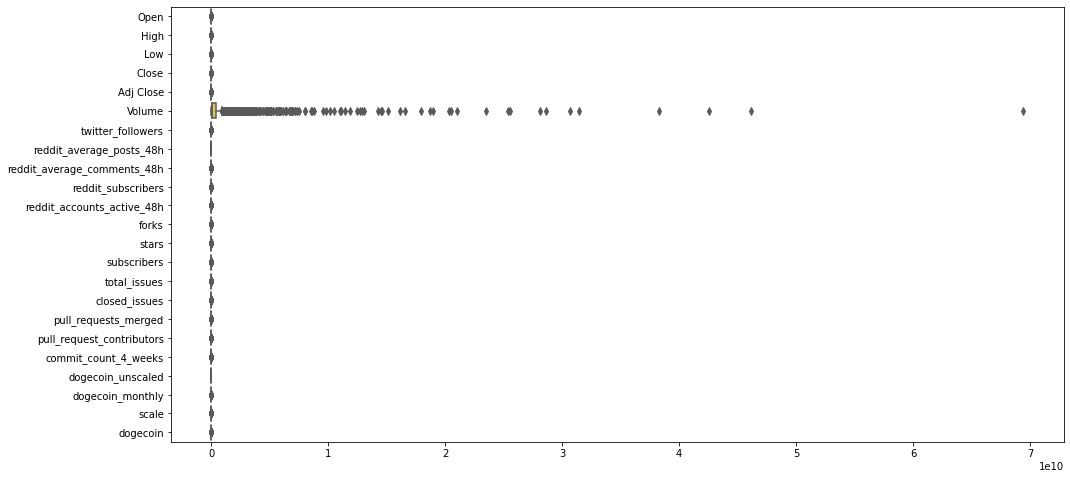

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, orient="h", palette="Set2")


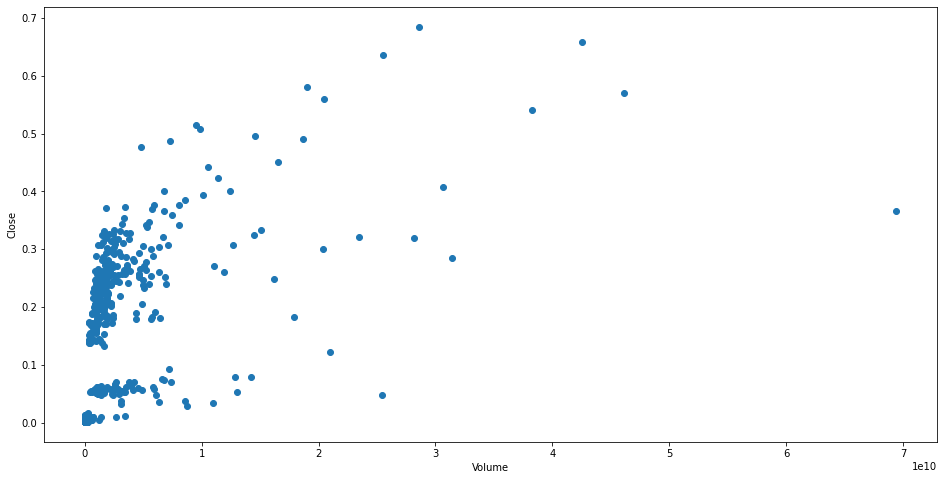

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Volume'], df['Close'])
ax.set_xlabel('Volume')
ax.set_ylabel('Close')
plt.show()

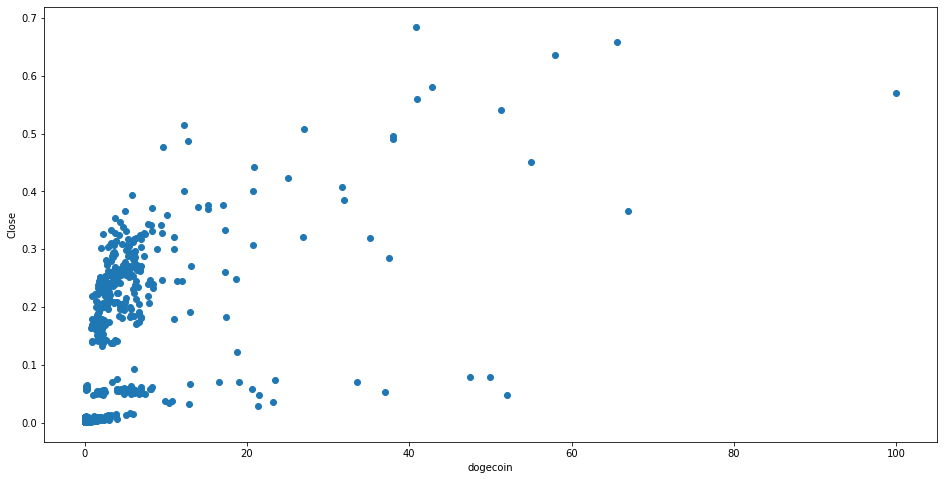

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['dogecoin'], df['Close'])
ax.set_xlabel('dogecoin')
ax.set_ylabel('Close')
plt.show()


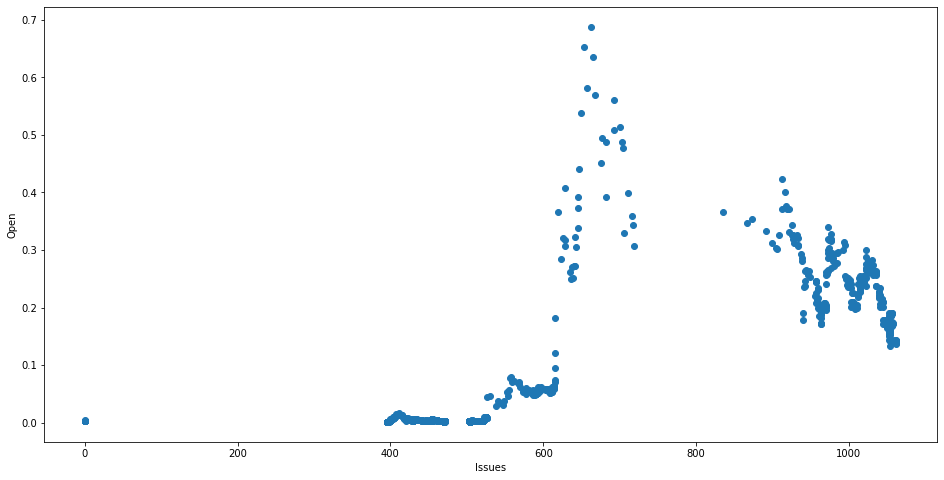

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['total_issues'], df['Open'])
ax.set_xlabel('Issues')
ax.set_ylabel('Open')
plt.show()


In [42]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df.to_csv('../doge_v1.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1549 entries, 2017-11-09 to 2022-02-04
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Open                         1549 non-null   float64
 1   High                         1549 non-null   float64
 2   Low                          1549 non-null   float64
 3   Close                        1549 non-null   float64
 4   Adj Close                    1549 non-null   float64
 5   Volume                       1549 non-null   int64  
 6   twitter_followers            1549 non-null   float64
 7   reddit_average_posts_48h     1549 non-null   float64
 8   reddit_average_comments_48h  1549 non-null   float64
 9   reddit_subscribers           1549 non-null   float64
 10  reddit_accounts_active_48h   1549 non-null   float64
 11  forks                        1549 non-null   float64
 12  stars                        1549 non-null   float64
 13  

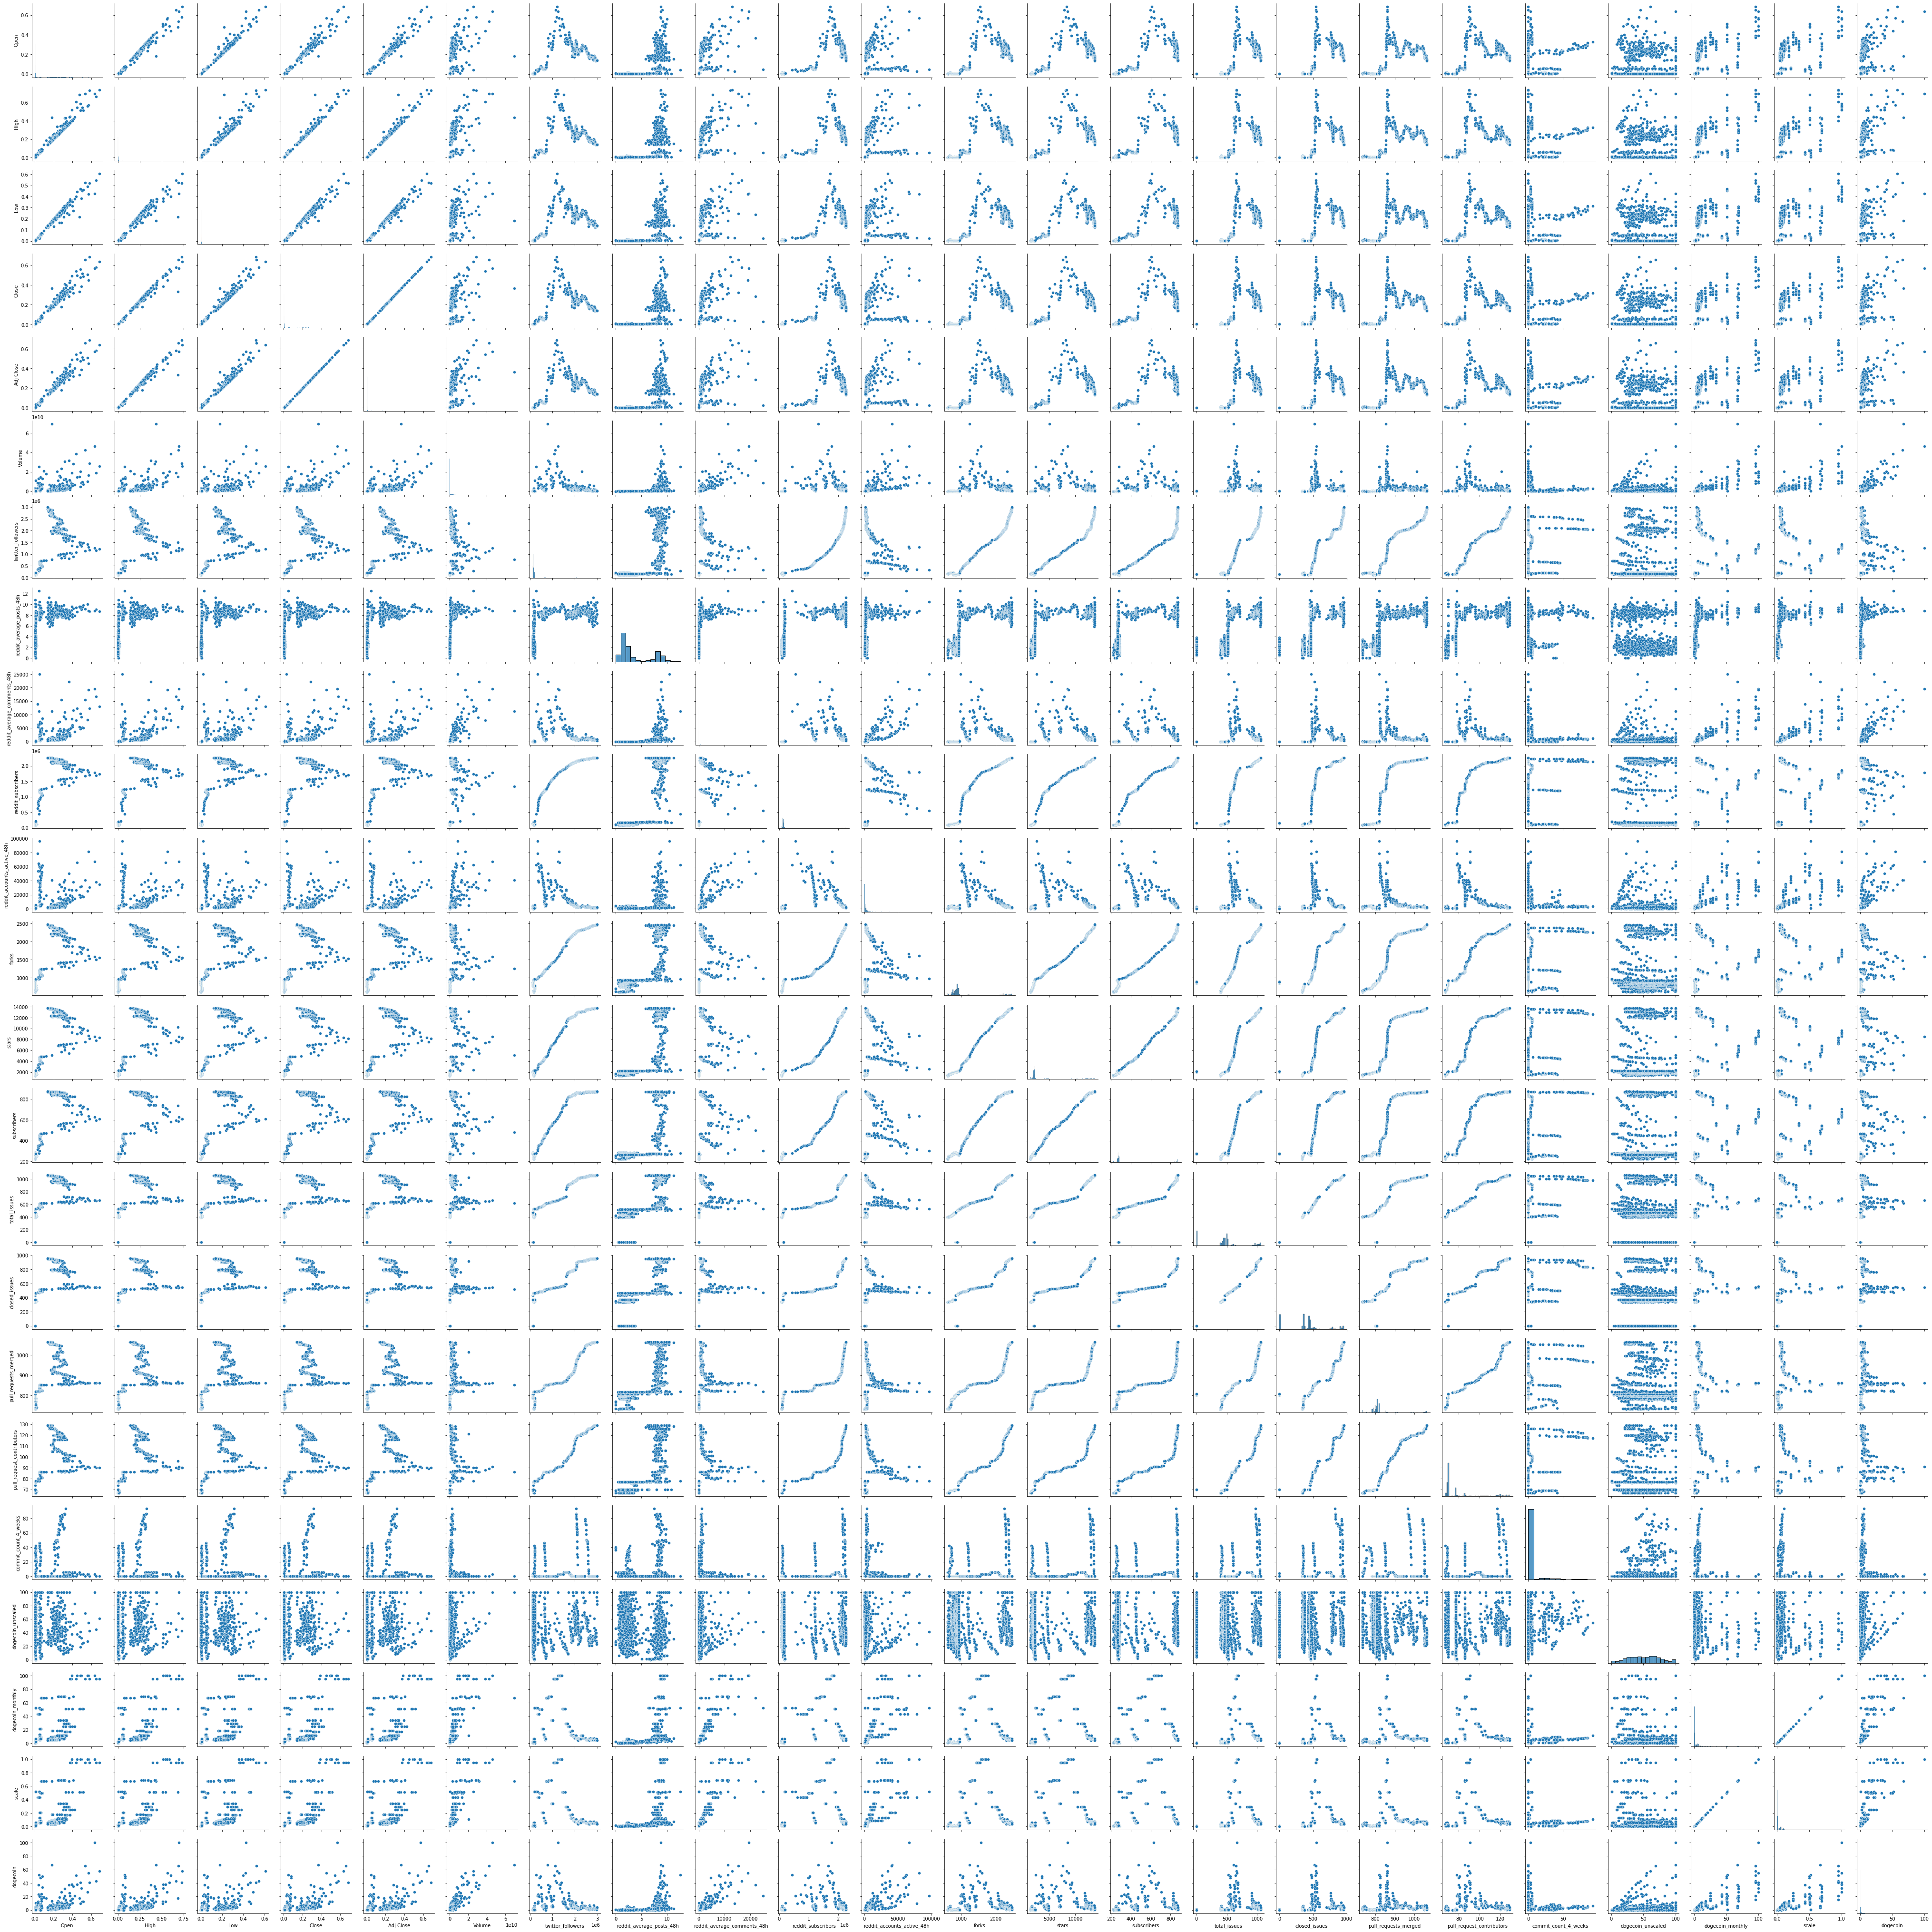

In [45]:
#Priprema sa skidanjem multikolinearnih varijabli
plot = sns.pairplot(df)
fig = plot.fig
fig.savefig("../doge_pair_plot.png")



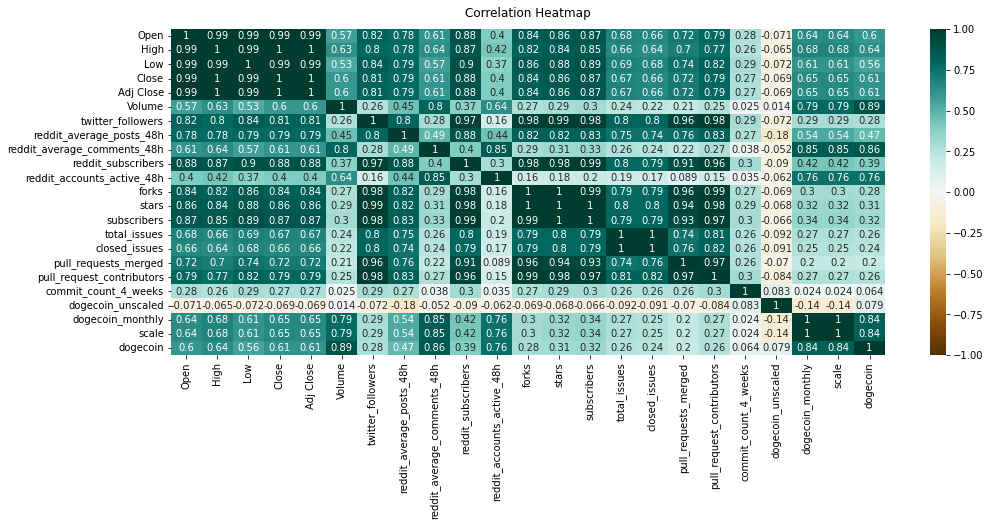

In [52]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('../heatmap.png', dpi=300, bbox_inches='tight')

In [54]:
to_remove_low_corr_independent = ['reddit_accounts_active_48h', 'commit_count_4_weeks',
                                  'dogecoin_unscaled']

for variable in to_remove_low_corr_independent:
    del df[variable]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1549 entries, 2017-11-09 to 2022-02-04
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Open                         1549 non-null   float64
 1   High                         1549 non-null   float64
 2   Low                          1549 non-null   float64
 3   Close                        1549 non-null   float64
 4   Adj Close                    1549 non-null   float64
 5   Volume                       1549 non-null   int64  
 6   twitter_followers            1549 non-null   float64
 7   reddit_average_posts_48h     1549 non-null   float64
 8   reddit_average_comments_48h  1549 non-null   float64
 9   reddit_subscribers           1549 non-null   float64
 10  forks                        1549 non-null   float64
 11  stars                        1549 non-null   float64
 12  subscribers                  1549 non-null   float64
 13  

In [57]:
#Izbacujem grupu finansijskih nezavisnih promenljivih sa stepenom korelacije 0.99 i 1
to_remove_high_multicolinearity = ['Open', 'Low', 'Adj Close']
for variable in to_remove_high_multicolinearity:
    del df[variable]

KeyError: 'Open'

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1549 entries, 2017-11-09 to 2022-02-04
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   High                         1549 non-null   float64
 1   Close                        1549 non-null   float64
 2   Volume                       1549 non-null   int64  
 3   twitter_followers            1549 non-null   float64
 4   reddit_average_posts_48h     1549 non-null   float64
 5   reddit_average_comments_48h  1549 non-null   float64
 6   reddit_subscribers           1549 non-null   float64
 7   forks                        1549 non-null   float64
 8   stars                        1549 non-null   float64
 9   subscribers                  1549 non-null   float64
 10  total_issues                 1549 non-null   float64
 11  closed_issues                1549 non-null   float64
 12  pull_requests_merged         1549 non-null   float64
 13  

In [59]:
#Izbacujem grupu developer nezavisnih promenljivih sa stepenom korelacije 0.99 i 1
to_remove_high_multicolinearity = ['stars', 'subscribers', 'pull_requests_merged', 'pull_request_contributors']
for variable in to_remove_high_multicolinearity:
    del df[variable]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1549 entries, 2017-11-09 to 2022-02-04
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   High                         1549 non-null   float64
 1   Close                        1549 non-null   float64
 2   Volume                       1549 non-null   int64  
 3   twitter_followers            1549 non-null   float64
 4   reddit_average_posts_48h     1549 non-null   float64
 5   reddit_average_comments_48h  1549 non-null   float64
 6   reddit_subscribers           1549 non-null   float64
 7   forks                        1549 non-null   float64
 8   total_issues                 1549 non-null   float64
 9   closed_issues                1549 non-null   float64
 10  dogecoin_monthly             1549 non-null   float64
 11  scale                        1549 non-null   float64
 12  dogecoin                     1549 non-null   float64
dtype

In [60]:
#Ostavljam dogecoin, a uklanjam scale
del df['scale']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1549 entries, 2017-11-09 to 2022-02-04
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   High                         1549 non-null   float64
 1   Close                        1549 non-null   float64
 2   Volume                       1549 non-null   int64  
 3   twitter_followers            1549 non-null   float64
 4   reddit_average_posts_48h     1549 non-null   float64
 5   reddit_average_comments_48h  1549 non-null   float64
 6   reddit_subscribers           1549 non-null   float64
 7   forks                        1549 non-null   float64
 8   total_issues                 1549 non-null   float64
 9   closed_issues                1549 non-null   float64
 10  dogecoin_monthly             1549 non-null   float64
 11  dogecoin                     1549 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 189.6 KB


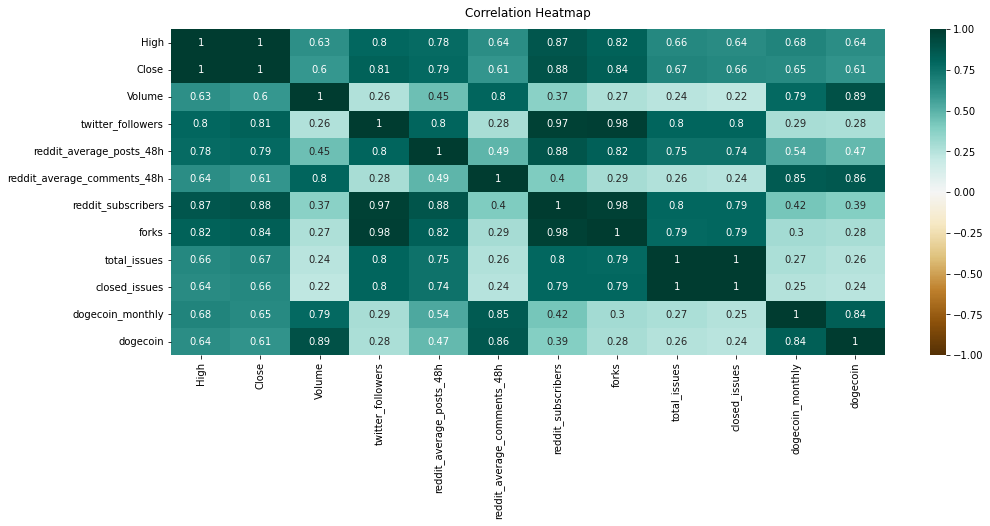

In [61]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('../heatmap_doge_v2.png', dpi=300, bbox_inches='tight')


In [64]:
#Dodatno ciscenje
to_delete = ['forks', 'closed_issues','reddit_subscribers']
for variable in to_delete:
    del df[variable]

KeyError: 'reddit_subscribers'

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1549 entries, 2017-11-09 to 2022-02-04
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   High                         1549 non-null   float64
 1   Close                        1549 non-null   float64
 2   Volume                       1549 non-null   int64  
 3   twitter_followers            1549 non-null   float64
 4   reddit_average_posts_48h     1549 non-null   float64
 5   reddit_average_comments_48h  1549 non-null   float64
 6   total_issues                 1549 non-null   float64
 7   dogecoin_monthly             1549 non-null   float64
 8   dogecoin                     1549 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 153.3 KB


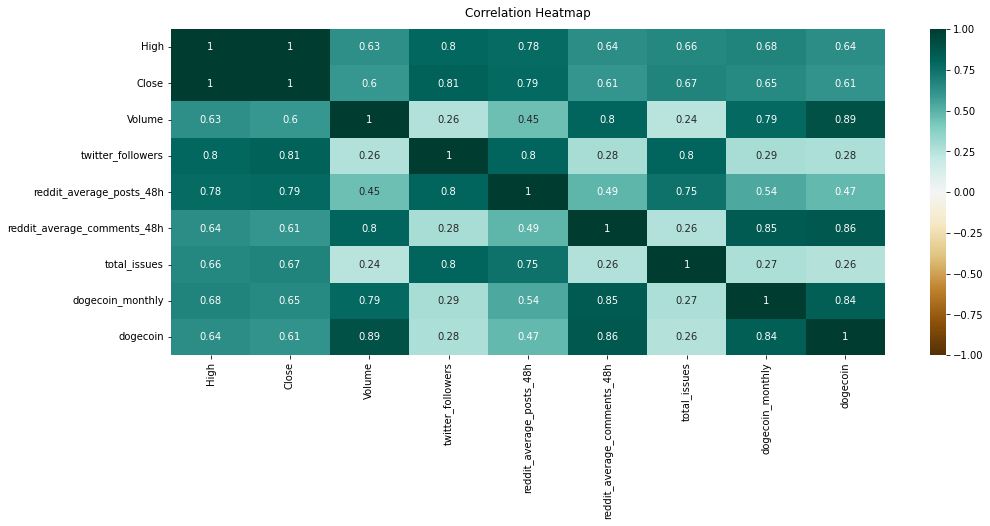

In [66]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [68]:
df.to_csv('../doge_v2.csv')
